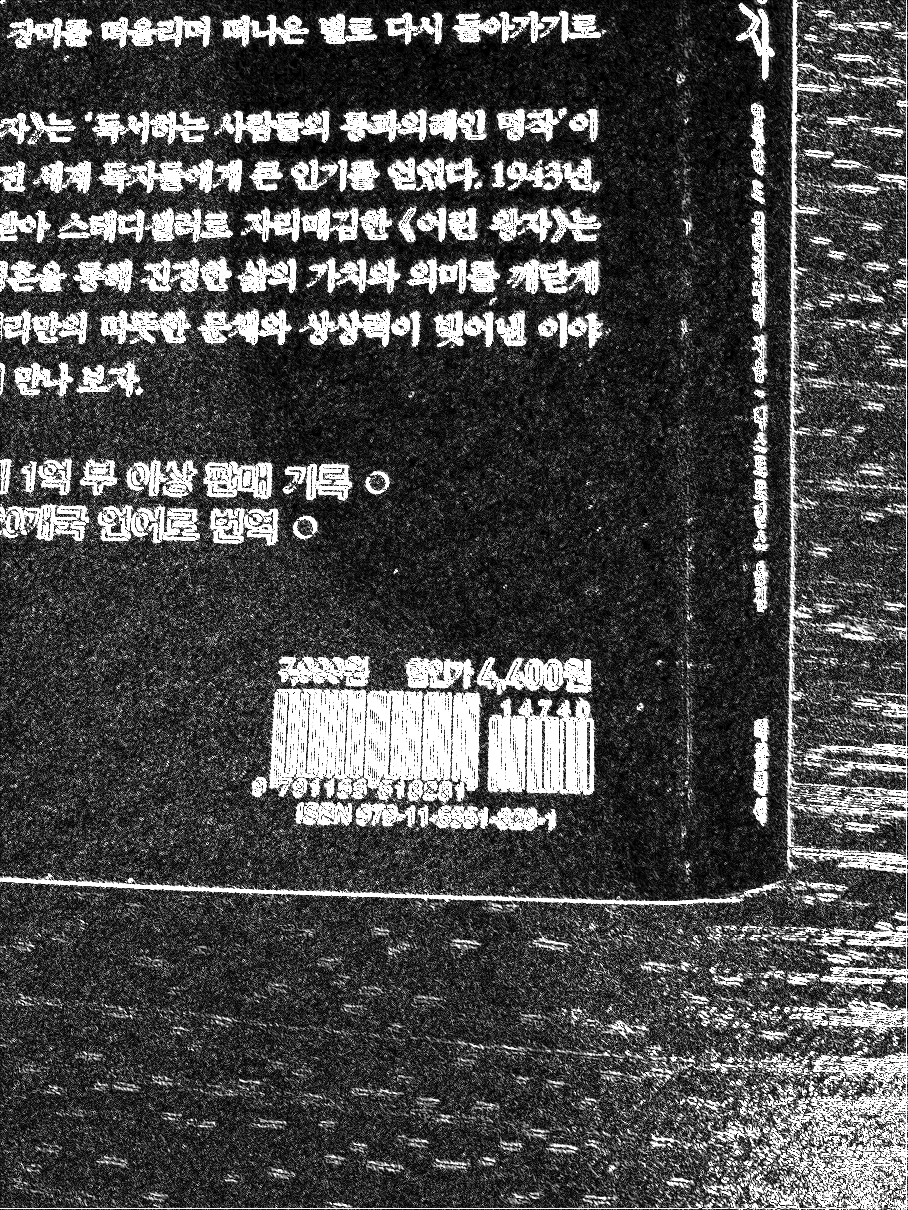

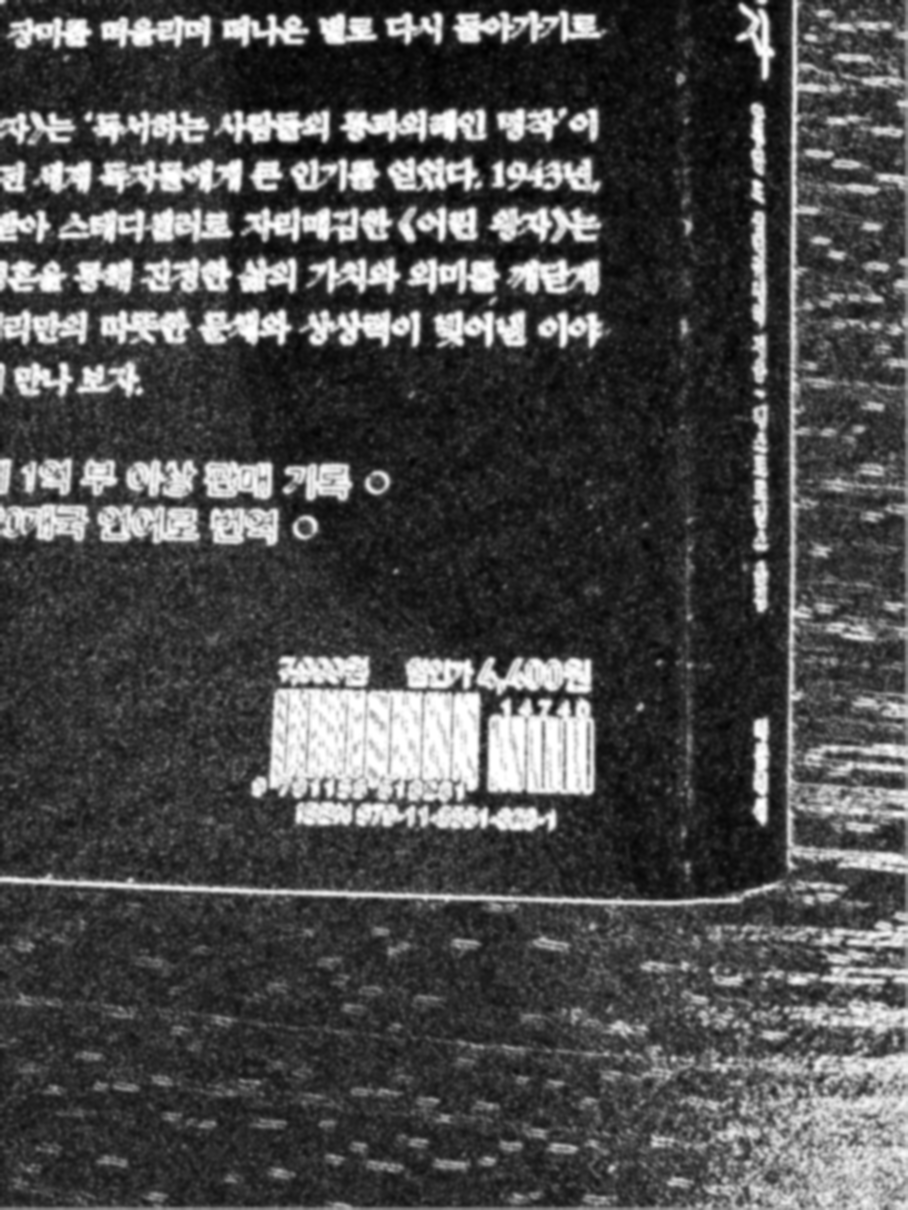

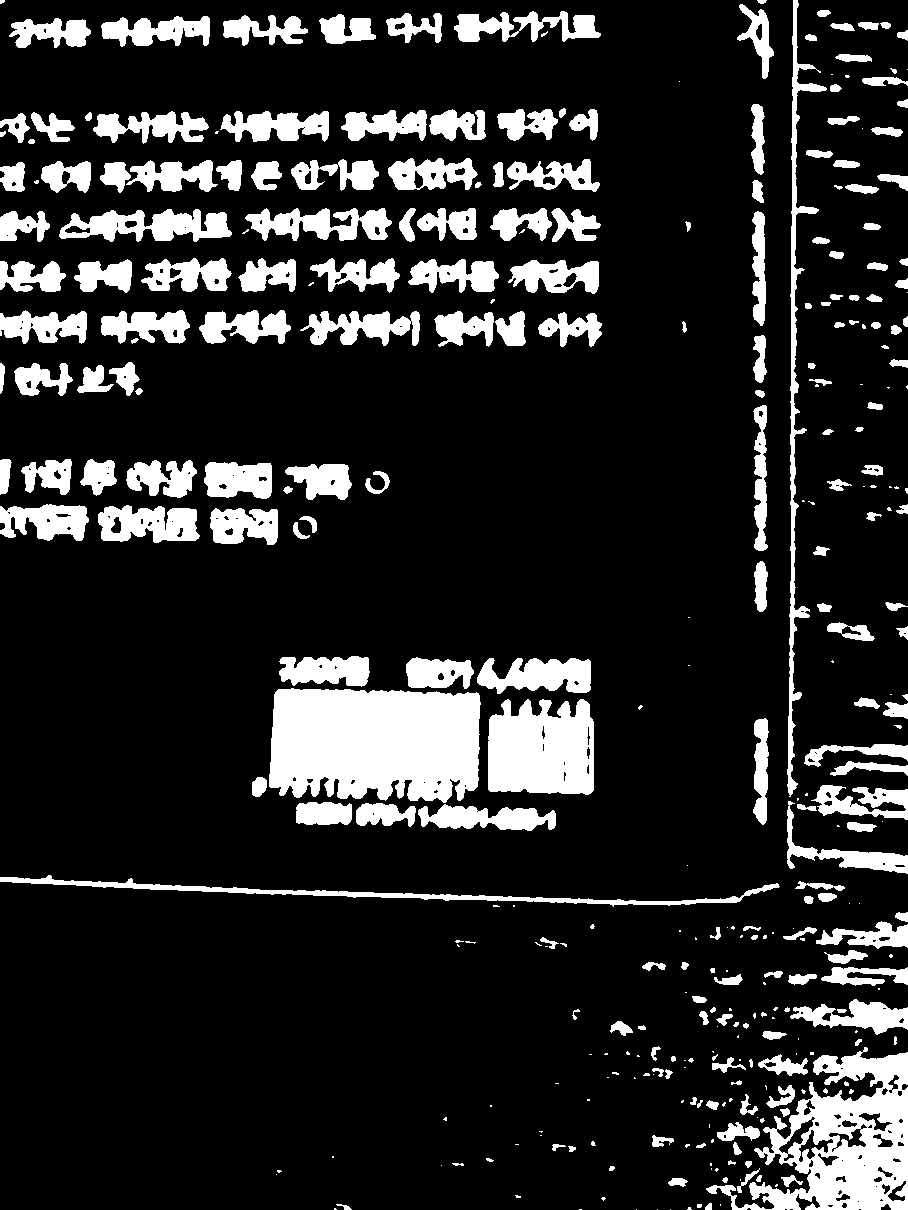

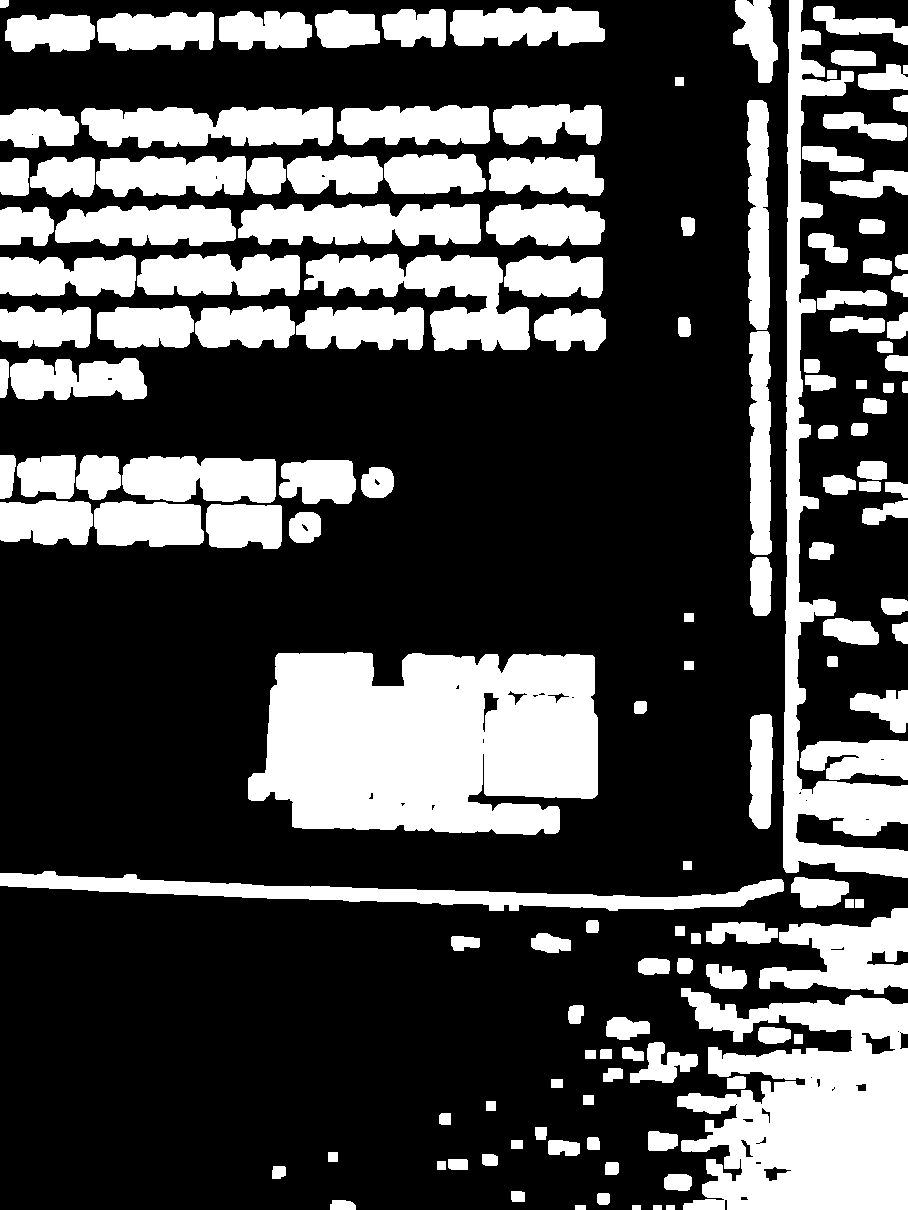

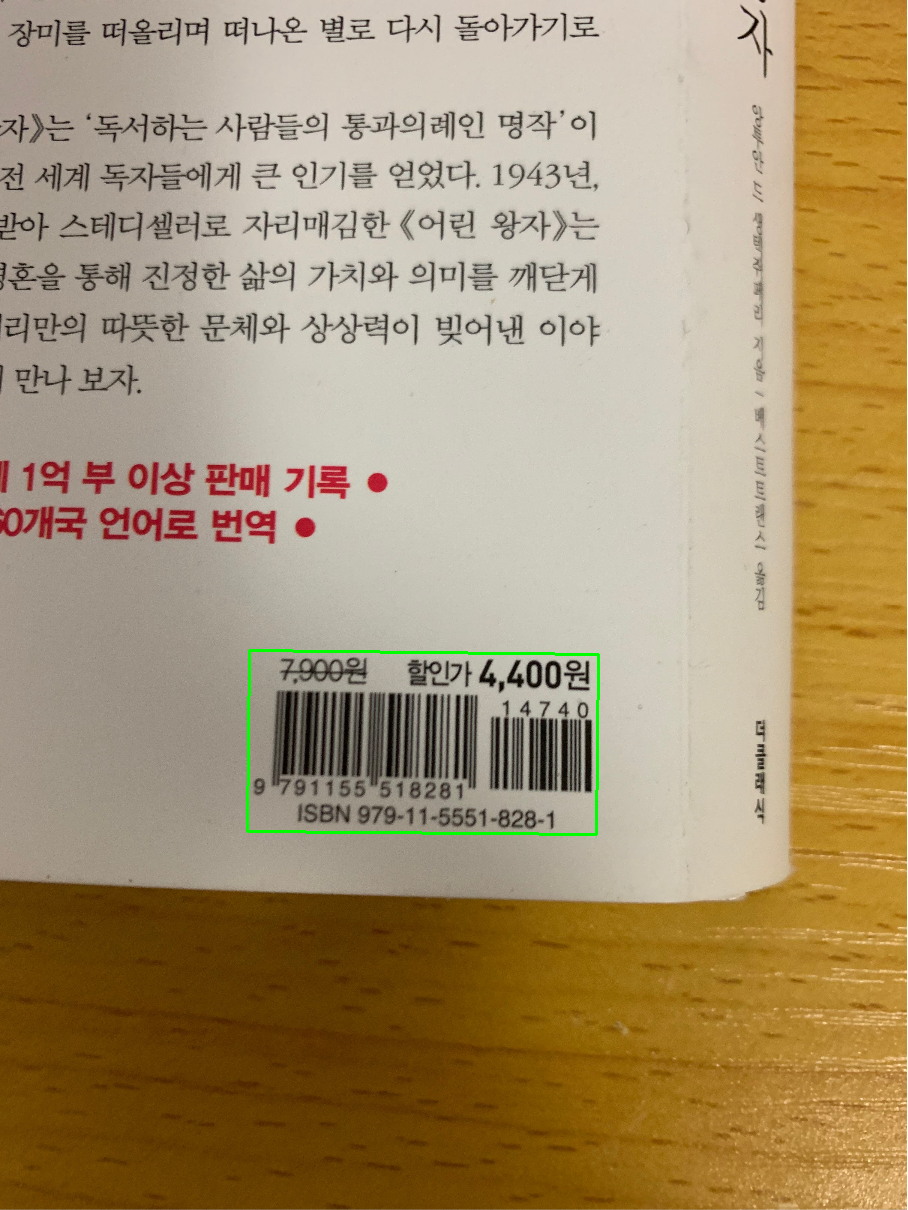

In [12]:
import numpy as np 
import cv2
from google.colab.patches import cv2_imshow


image = cv2.imread('barcode.jpg')
image=cv2.resize(image,None,fx=0.3, fy=0.3)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

 
gradX = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = -1)
gradY = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 0, dy = 1, ksize = -1)

 
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)


blurred = cv2.GaussianBlur(gradient, (9,9),0)
(_, thresh) = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY)



closed = cv2.erode(thresh, None, iterations = 4)
closed = cv2.dilate(thresh, None, iterations = 4)


(_, cnts, _) = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
 
# compute the rotated bounding box of the largest contour
rect = cv2.minAreaRect(c)
box = np.int0(cv2.boxPoints(rect))
 

cv2.drawContours(image, [box], -1, (0, 255, 0), 2)

cv2_imshow(gradient)
cv2_imshow(blurred)
cv2_imshow(thresh)
cv2_imshow(closed)

cv2_imshow(image)